In [1]:
from sklearn.datasets import load_iris
import pandas as pd
dataset=load_iris()
data=pd.DataFrame(dataset.data,columns=dataset.feature_names) #extracting data from the dataset onto a panda dataframe.
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
data.info()
#no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
data.duplicated().sum()

1

In [4]:
data.describe()
#initial observation shows low level of skewness except maybe petal length (cm)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.skew()
#all the features are showing acceptable  levels of skewness.

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler 
stdscale=StandardScaler()
dat=stdscale.fit_transform(data) #data is scaled for efficient machine learning.
dat

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

KMEANS CLUSTERING

Kmeans clustering is a method of unsupervised machine learning technique in which data points are grouped into distinct groups(clusters) with each group showing some form of similarity in feature characteristics.

The given dataset is an unlabelled dataset and so kmeans clustering will be good for this data.

In [7]:
from sklearn.cluster import KMeans
clust=[]
k_values=range(1,11)
for i in k_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dat)
    clust.append(kmeans.inertia_)#storing the inertia values of each number of clusters to find the best number of clusters.
clust

C:\Users\josep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[600.0000000000001,
 222.36170496502302,
 140.0327527742865,
 114.55684421262922,
 90.85957480474879,
 96.39812975293415,
 72.96367739035094,
 65.29490200999723,
 55.6650364138971,
 47.22323970251213]

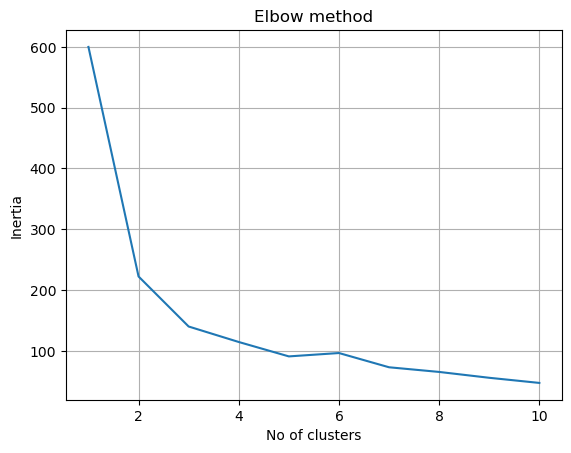

In [8]:
import matplotlib.pyplot as plt
plt.plot(k_values,clust) #to check the best number of clusters by elbow method
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()
#by elbow method best number of clusters is identified to be 3

In [9]:
kmeans=KMeans(n_clusters=3)
data['cluster']=kmeans.fit_predict(data)
data

C:\Users\josep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(dat,data['cluster'])

0.4472199222829889

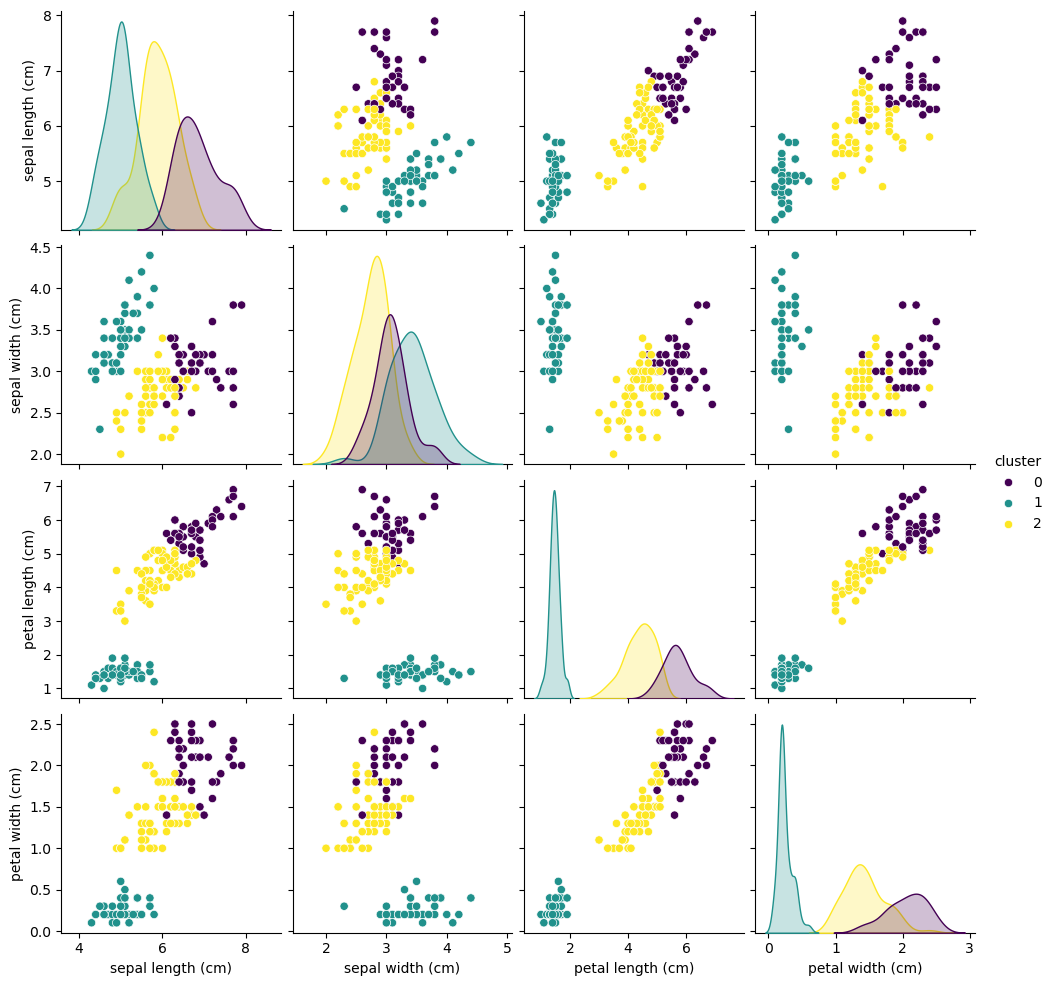

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data,hue='cluster',palette='viridis')
plt.show()

HEIRARCHICAL CLUSTERING

Heirarchical clustering is a method in unsupervised machine learning in which data points are initially considered to be distinct clusters and then clusters that are near to each other are iteratively merged together until a single cluster is formed or a stopping condition is met.

The given dataset is an unlabelled dataset and so heirarchichal clustering will be good for this data.


In [12]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

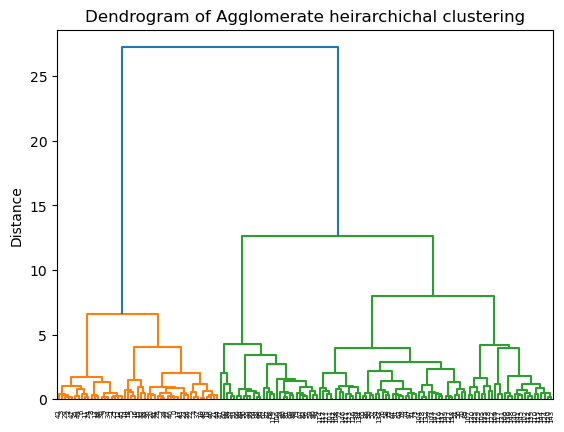

In [14]:
#to find the appropriate no. of clusters dendrogram is drawn
Z=linkage(dat,method='ward')
dendrogram(Z)
plt.title('Dendrogram of Agglomerate heirarchichal clustering')
plt.ylabel('Distance')
plt.show()
#by viewing the dendrogram no.of clusters are again decided to be 3.

In [15]:
ac=AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean')
data['cluster']=ac.fit_predict(dat)

In [16]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(dat,data['cluster'])

0.4466890410285909

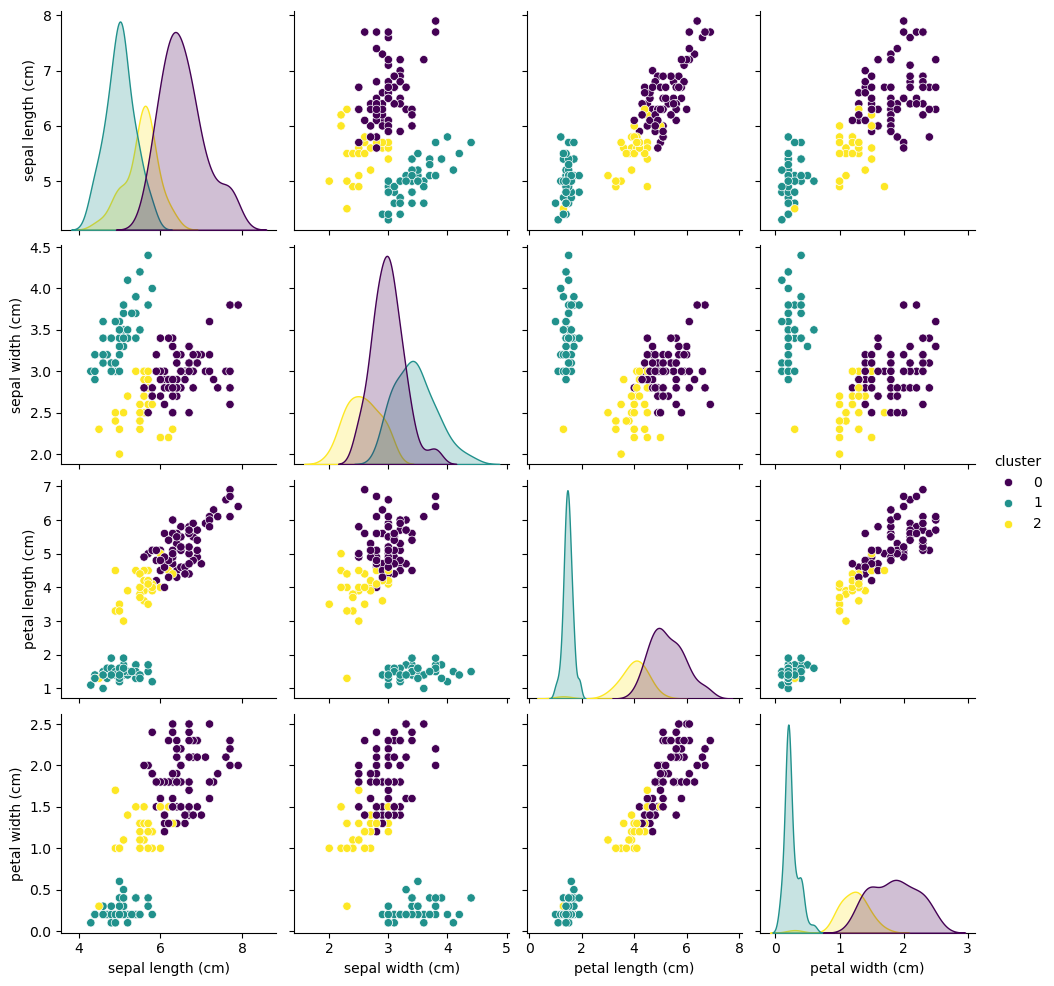

In [18]:
sns.pairplot(data,hue='cluster',palette='viridis')
plt.show()

In [19]:
#The agglomerate heirarchichal clustering seems to fare better than kmeans clustering even though there scores are very similar(0.447 vs 0.444). 
#The data is of very small size so the models might not be of great reliability. 